In [38]:
import Simulacion
import matplotlib.pyplot as plt
import numpy as np
import threading
from concurrent.futures.thread import ThreadPoolExecutor

In [43]:
alfas = [0.01, 0.05, 0.1, 0.2, 0.35, 0.5, 1]
tiempo = 1000
n = 10000
m = 20
dias, diasBase = 7, 5
lat, latBase = 5, 3
betas = [0.1, 1, 2, 5]

In [39]:
def Informar(n : int, m : int , tiempo : int, dias : int, diasBase : int, lat : int, latBase : int, alfas : list[int], beta : int):
    lalfas = len(alfas)
    contagios, satisfaccion = [None] * lalfas, [None] * lalfas
    
    def _simulacion(i):
        contagios[i], satisfaccion[i], _ = Simulacion.Simular(n,m,alfa = alfas[i], beta = beta, t = tiempo, dias = dias, diasBase = diasBase, lat = lat, latBase = latBase)

    with ThreadPoolExecutor(max_workers = lalfas) as executor:
        for i in range(lalfas):
            executor.submit(_simulacion, i)

    #for alfa in alfas:
    #    con, sat, _ = Simulacion.Simular(n,m,alfa = alfa, beta = beta, t = tiempo, dias = dias, diasBase = diasBase, lat = lat, latBase = latBase)
    #    contagios.append(con)
    #    satisfaccion.append(sat)

    def Contagios():
        for i in range(len(alfas)):
            plt.plot(contagios[i], label = 'alfa = ' + str(alfas[i]))
        plt.title(f"Contagios \nn = {n}, m = {m}, t = {tiempo}, dias = {dias} + {diasBase}, lat = {lat} + {latBase}, beta = {beta}")
        plt.legend()
        plt.show()
        
    def Satisfaccion():
        for i in range(len(alfas)):
            plt.plot(satisfaccion[i], label = 'alfa = ' + str(alfas[i]))
        plt.title(f"Satisfaccion \nn = {n}, m = {m}, t = {tiempo}, dias = {dias} + {diasBase}, lat = {lat} + {latBase}, beta = {beta}")
        plt.legend()
        plt.show()
    
    return Contagios, Satisfaccion
        
    


In [20]:
Contagios, Satisfaccion = Informar(n,m,tiempo,dias,diasBase,lat,latBase,alfas,1)

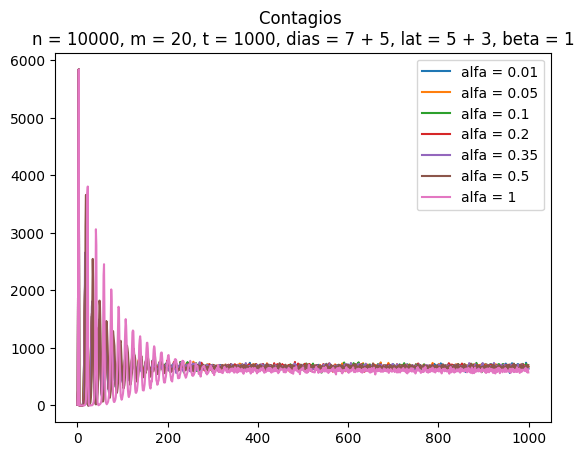

In [21]:
Contagios()

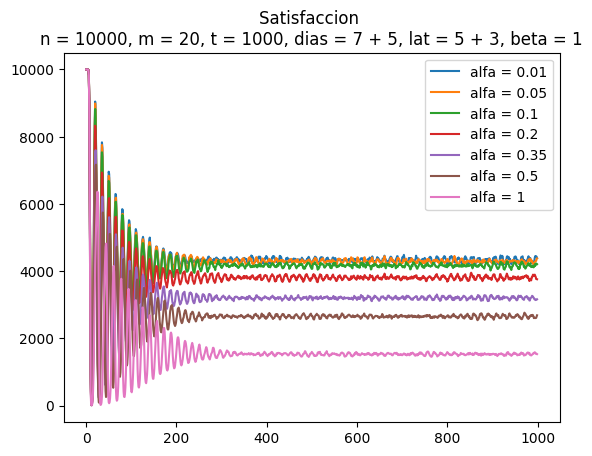

In [22]:
Satisfaccion()

In [23]:
Contagios, Satisfaccion = Informar(n,m,tiempo,dias,diasBase,lat,latBase,alfas,5)

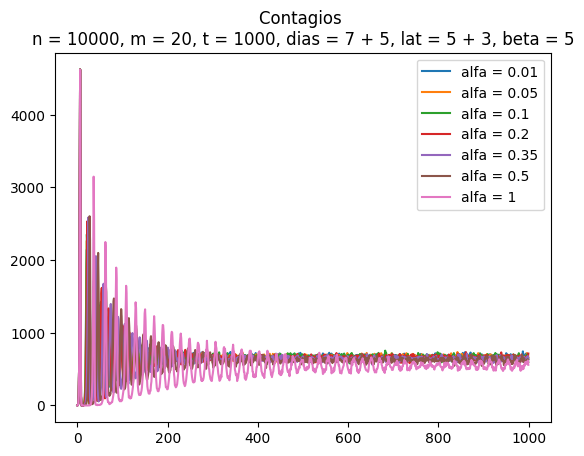

In [24]:
Contagios()

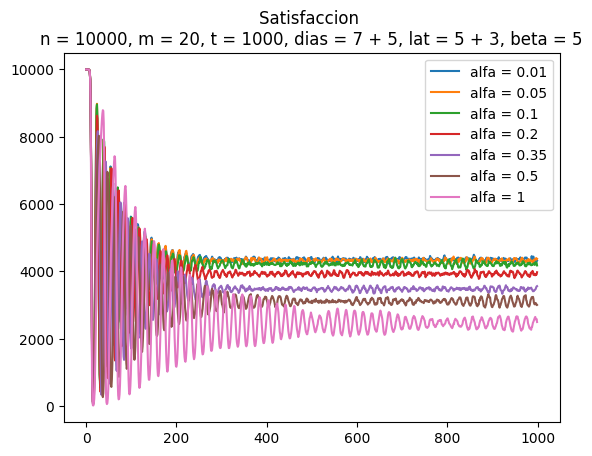

In [25]:
Satisfaccion()

In [44]:
Contagios, Satisfaccion = Informar(n,m,tiempo,dias,diasBase,lat,latBase,alfas,10)

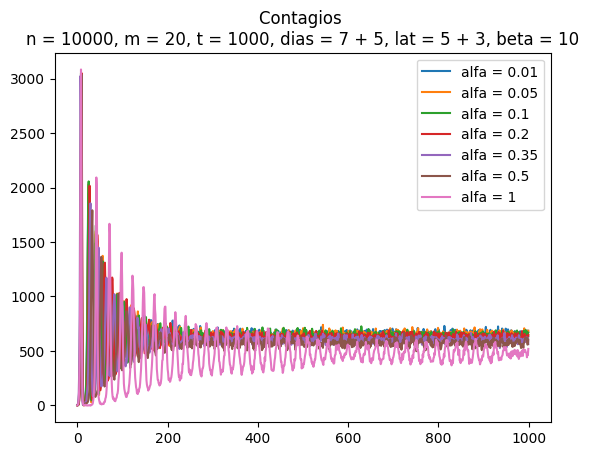

In [45]:
Contagios()

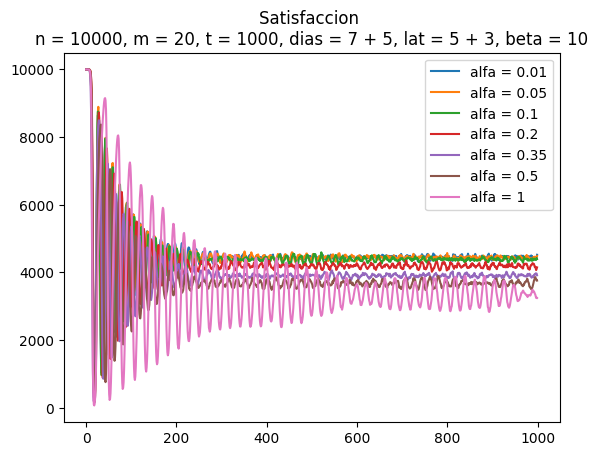

In [46]:
Satisfaccion()